In [12]:
%matplotlib inline
from matplotlib.pyplot import hist
import matplotlib.pyplot as plt
import numpy as np

In [5]:
rating_data = sc.textFile("data/ml-100k/u.data")
print rating_data.first()
print "Number of ratings: %d" % (rating_data.count())

196	242	3	881250949
Number of ratings: 100000


In [10]:
rating_dat = rating_data.map(lambda line: line.split("\t"))
ratings = rating_dat.map(lambda fields: int(fields[2]))
#max_rating = ratings.reduce(lambda x, y: max(x, y))
#min_rating = ratings.reduce(lambda x, y: min(x, y))
#mean_rating = ratings.reduce(lambda x, y: x + y) / num_ratings
#median_rating = np.median(ratings.collect())
ratings.stats()

(count: 100000, mean: 3.52986, stdev: 1.12566797076, max: 5.0, min: 1.0)

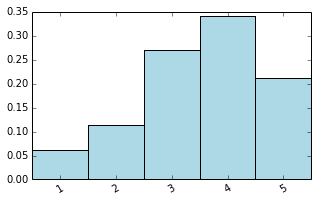

In [16]:
count_by_rating = ratings.countByValue()
x_axis = np.array(count_by_rating.keys())
y_axis = np.array([float(c) for c in count_by_rating.values()])
# we normalize the y-axis here to percentages
y_axis_normed = y_axis / y_axis.sum()
pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)
plt.bar(pos, y_axis_normed, width, color='lightblue')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(5, 3)